In [47]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, model_selection, preprocessing, decomposition, datasets, metrics

In [48]:
# Importing the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [49]:
# Creating the dataframe from the dataset

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [51]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
# Scaling the features (standardization)

scaler = preprocessing.StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [53]:
# Reducing the dimensions using PCA

pc = decomposition.PCA(n_components = 2)

new_df = pd.DataFrame(pc.fit_transform(scaled_df), columns = pc.get_feature_names_out())
new_df.head()

,pca0,pca1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [54]:
# Scaling the features (MinMax)

scaler = preprocessing.MinMaxScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(new_df), columns = new_df.columns)

new_df = scaled_df.copy()

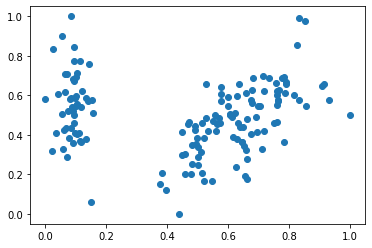

In [55]:
# Visualizing the datapoints through a scatterplot

plt.scatter(new_df['pca0'], new_df['pca1'])
plt.show()

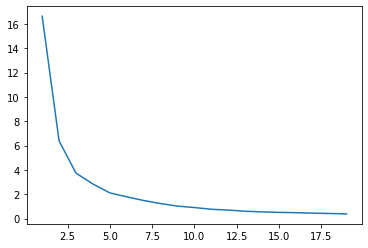

In [56]:
# Determining the correct number of clusters using elbow plot

df = new_df.copy()
sse = []

for i in range(1, 20):
    model = cluster.KMeans(n_clusters = i)
    model.fit(df)
    sse.append(model.inertia_)

plt.plot(range(1, 20), sse)
plt.show()

In [57]:
# Clustering the data

model = cluster.KMeans(n_clusters = 3)
labels = model.fit_predict(df)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


In [58]:
df['cluster'] = labels
df.head()

,pca0,pca1,cluster
0,0.083753,0.586871,0
1,0.113949,0.370750,0
2,0.067397,0.432961,0
3,0.078054,0.385120,0
4,0.063188,0.618106,0


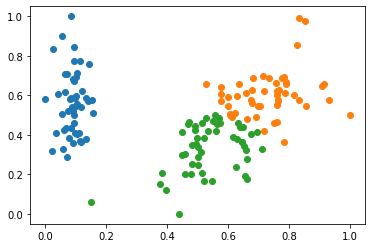

In [59]:
# Visualizing the clusters

df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]

plt.scatter(df0['pca0'], df0['pca1'])
plt.scatter(df1['pca0'], df1['pca1'])
plt.scatter(df2['pca0'], df2['pca1'])

plt.show()